# First Steps in the analysis of functional data

In [231]:
library(IRdisplay)
library(tidyverse)

png 
  2

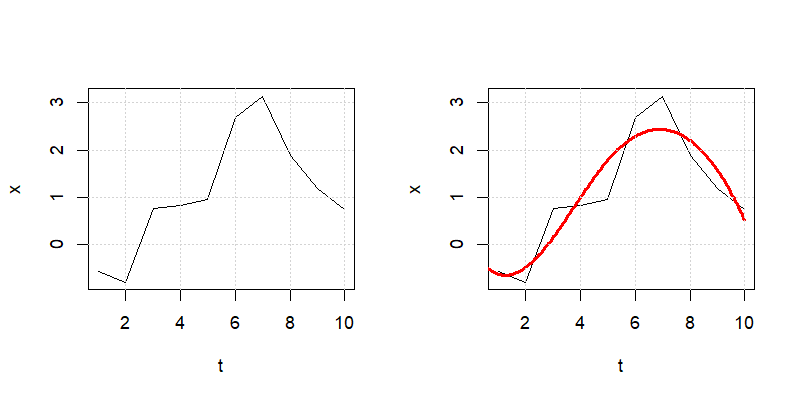

In [235]:
set.seed(123)
x = cumsum(rnorm(10))
B25.basis = create.bspline.basis(rangeval=c(0,10), nbasis=5)
x_fd = smooth.basis(y=x, fdParobj = B25.basis)

png("00-sample.png", width=800, height = 400) 
par(mfrow=c(1,2), cex=1.5)

plot.ts(x, xlab="t", ylab="x")
grid()

plot.ts(x, xlab="t", ylab="x")
lines(x_fd, lwd=3, col="red")
grid()

dev.off()

png_data <- readBin("00-sample.png", "raw", file.size("00-sample.png"))
display_png(png_data)

## 1.1 Basis expansion

In [140]:
library(fda)

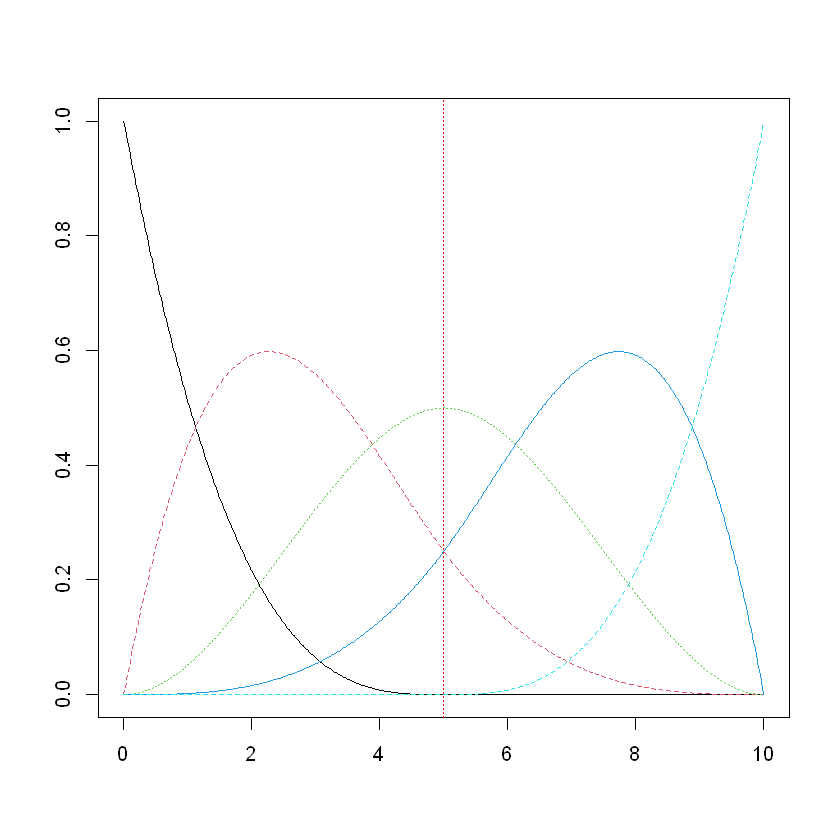

In [141]:
spline.basis = create.bspline.basis(rangeval=c(0,10), nbasis=5, norder=4)
plot(spline.basis)

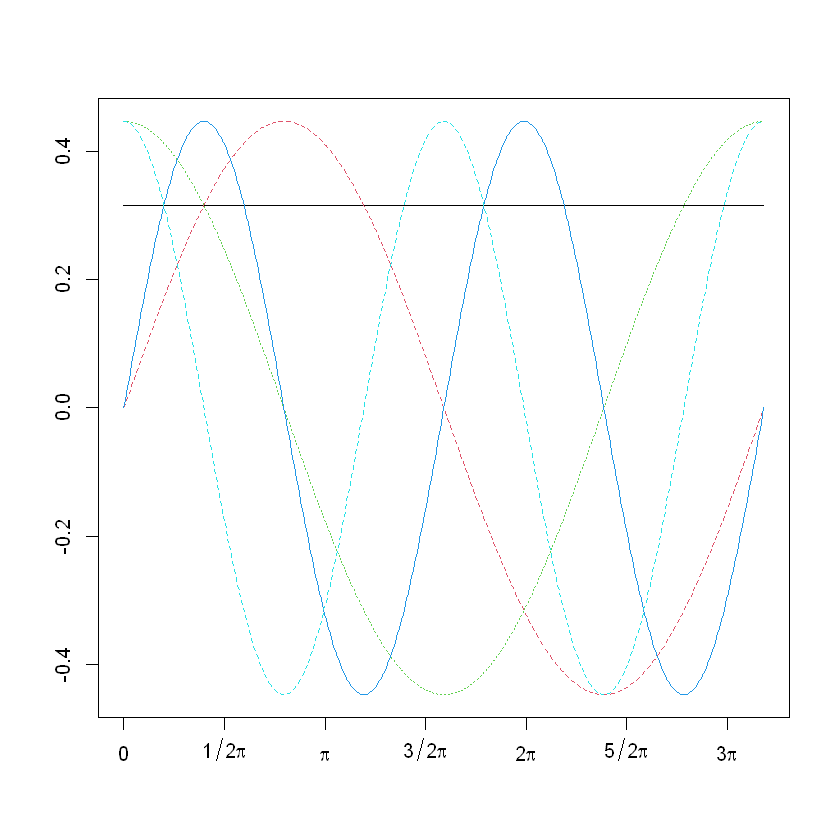

In [6]:
fourier.basis = create.fourier.basis(rangeval=c(0,10), nbasis=5)
plot(fourier.basis, xaxt="n")
axis(1, at=seq(0, 3*pi, by=pi/2), 
     labels=expression(0, 1/2*pi, pi, 3/2*pi, 2*pi, 5/2*pi, 3*pi))

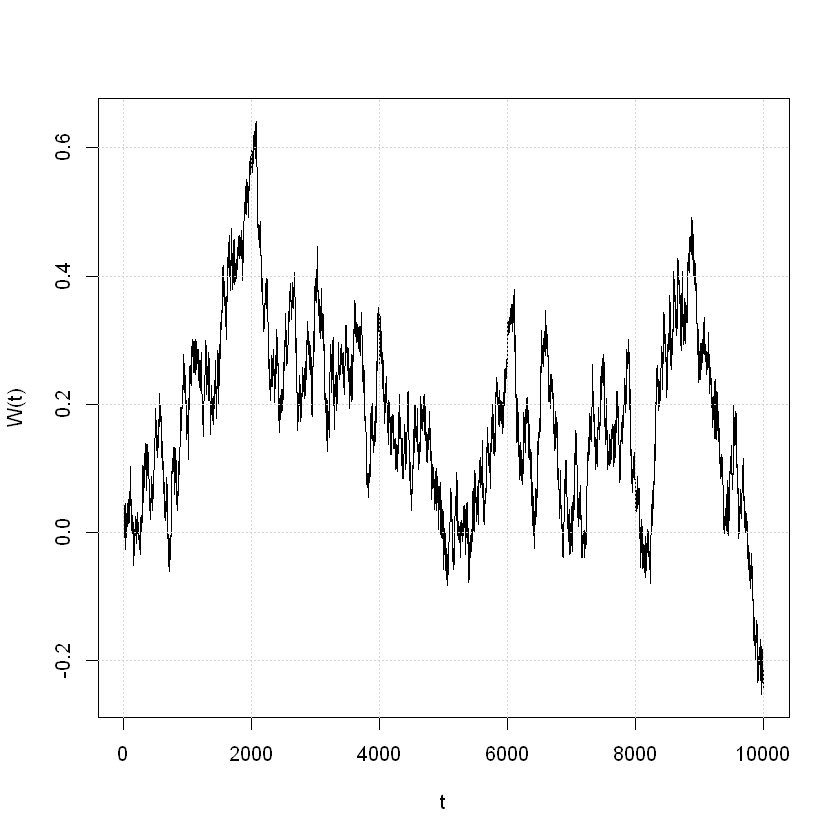

In [7]:
set.seed(123)
Wiener = cumsum(rnorm(10000))/100
plot.ts(Wiener, xlab="t", ylab="W(t)")
grid()

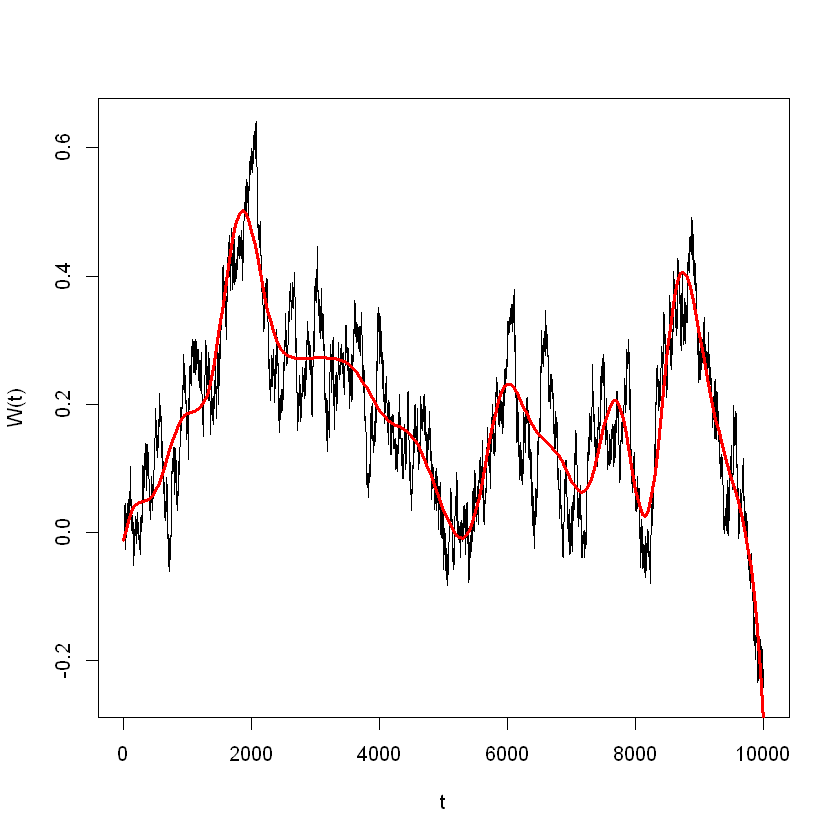

In [20]:
set.seed(123)
Wiener = cumsum(rnorm(10000))/100
plot.ts(Wiener, xlab="t", ylab="W(t)")
B25.basis = create.bspline.basis(rangeval=c(0,10000), nbasis=25)
Wiener.fd = smooth.basis(y=Wiener, fdParobj = B25.basis)
lines(Wiener.fd, lwd=3, col="red")

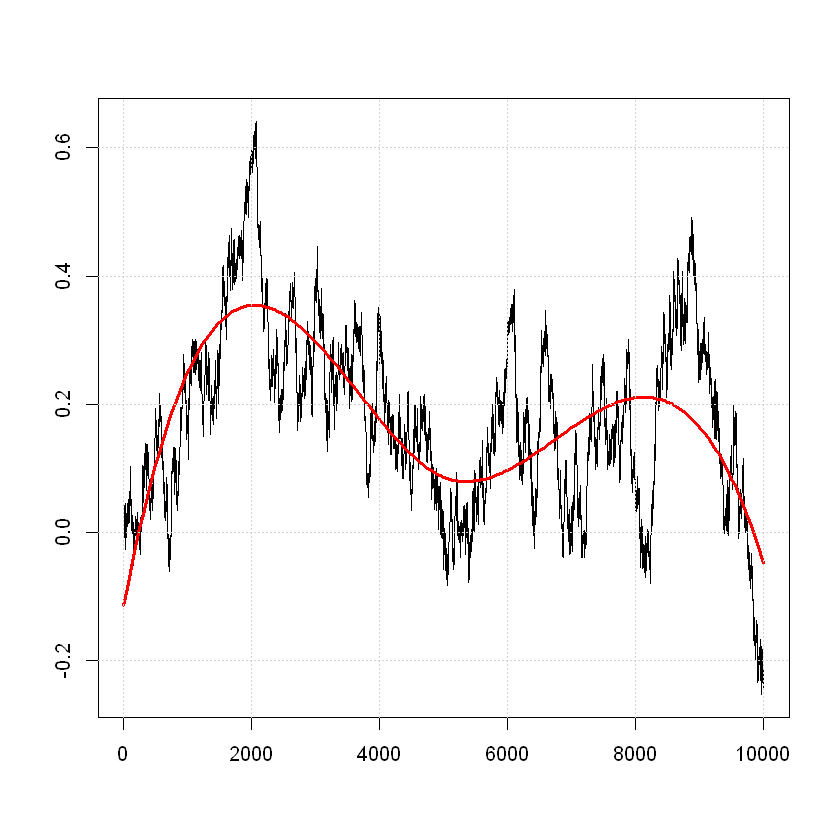

In [44]:
set.seed(123)
Wiener = cumsum(rnorm(10000))/100
plot.ts(Wiener, xlab="", ylab="")
B25.basis = create.bspline.basis(rangeval=c(0,10000), nbasis=5)
Wiener.fd = smooth.basis(y=Wiener, fdParobj = B25.basis)
lines(Wiener.fd, lwd=3, col="red")
grid()

wiener = cumsum(rnorm(10000))/100

このコードは、Wiener過程をシミュレーションしています。Wiener過程は、確率微分方程式に従う確率過程の1つであり、連続的なランダムな変動を表します。

具体的には、以下のような手順でWiener過程をシミュレーションしています。

1. rnorm関数を使用して、標準正規分布からの乱数を10,000個生成します。これは、Wiener過程における単位時間あたりの変化を表す乱数です。
1. cumsum関数を使用して、乱数を累積和に変換します。これにより、時点tまでの変化の合計が求まります。
1. 100で割ることで、単位時間あたりの変化の平均を求めます。これにより、時点tまでの平均変化が求まります。

したがって、wienerという変数には、時点tまでのWiener過程における平均変化が格納されています。

100で割る作業がよくわからない

確かに、コードの100で割る部分は少しわかりにくいかもしれません。

Wiener過程の特徴の1つに、時刻tにおける変化量の期待値が0であり、分散がtであることが挙げられます。つまり、時刻tまでの変化の平均値は0であるべきです。しかし、上記のコードで生成される乱数の累積和を求めると、時刻tまでの変化の総和が得られます。このままでは、時刻tまでの平均変化が0にならず、累積和が増加し続けるため、Wiener過程としての性質を満たしません。

そこで、累積和を100で割ることで、単位時間あたりの平均変化を求めています。具体的には、時刻tまでの変化の総和を100で割ることで、時刻tまでの単位時間あたりの平均変化が得られます。これにより、生成されたwienerの値は、Wiener過程の性質を満たすようになります。

00というのはこのコードの単位時間という認識でいい？

はい、その通りです。このコードでは、単位時間あたりの変化を表すために、累積和を100で割っています。この場合、1つの単位時間あたりにおける平均的な変化量を表すことになります。なお、この単位時間は任意の時間幅で設定できます。たとえば、もし単位時間を0.01にしたい場合は、コード中の100を0.01に置き換えることができます。


例えばの話、一つ一つの乱数が0.01秒ごとに生成されていたとしたら、100で割ることで1秒ごとの平均変化量になるってこと？

はい、その通りです。たとえば、1つ1つの乱数が0.01秒ごとに生成されていた場合、累積和を100で割ることで1秒ごとの平均変化量が得られます。つまり、累積和を100で割るという処理は、1秒間あたりの平均変化量を求めるために必要な処理と言えます。Wiener過程の場合、単位時間をどのように設定するかによって、変化の速度や精度が変わってくるため、単位時間の設定には注意が必要です。









## 1.2 Sample mean and covariance

[1] "done"

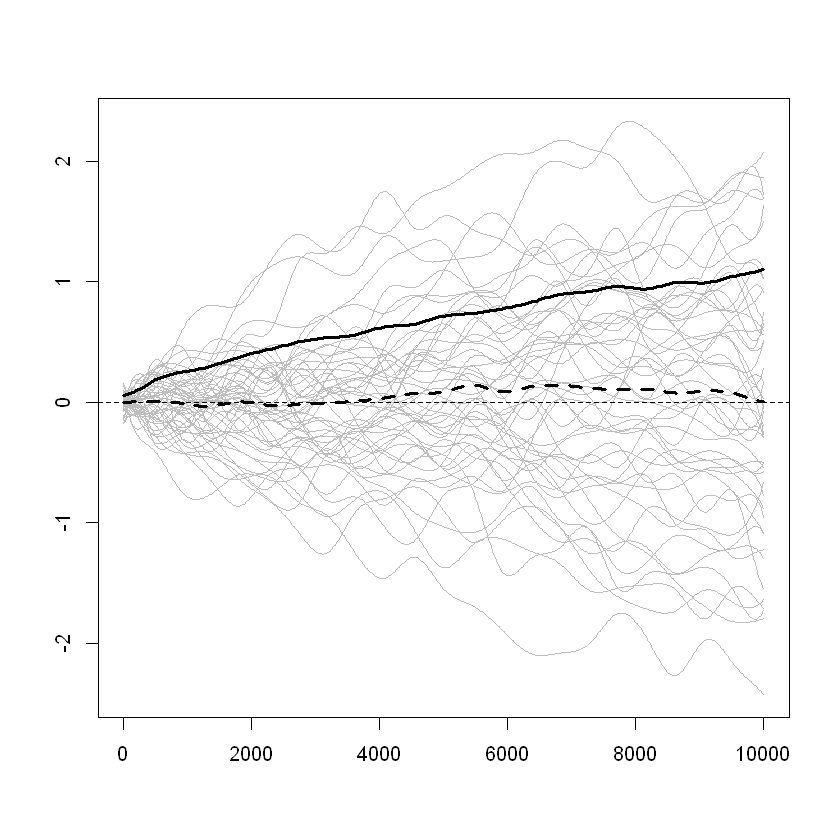

In [143]:
set.seed(123)
N = 50
W_mat = matrix(0, ncol=N, nrow=10000)
for(n in 1:N){
    W_mat[, n] = cumsum(rnorm(10000)/100)
}
B25_basis = create.bspline.basis(rangeval=c(0,10000), nbasis=25)
W_fd = smooth.basis(y=W_mat, fdParobj=B25.basis)
plot(W_fd, ylab="", xlab="", col="gray", lty=1)
W_mean = mean.fd(W_fd$fd)
W_sd = std.fd(W_fd$fd)
lines(W_sd, lwd=3)
lines(W_mean, lty=2, lwd=3)

In [145]:
str(W_fd$fd)

List of 3
 $ coefs  : num [1:25, 1:50] -0.01219 0.07184 0.00152 0.23244 0.13722 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:25] "bspl4.1" "bspl4.2" "bspl4.3" "bspl4.4" ...
  .. ..$ : NULL
 $ basis  :List of 10
  ..$ call       : language basisfd(type = type, rangeval = rangeval, nbasis = nbasis, params = params,      dropind = dropind, quadvals = qu| __truncated__
  ..$ type       : chr "bspline"
  ..$ rangeval   : num [1:2] 0 10000
  ..$ nbasis     : num 25
  ..$ params     : num [1:21] 455 909 1364 1818 2273 ...
  ..$ dropind    : NULL
  ..$ quadvals   : NULL
  ..$ values     : list()
  ..$ basisvalues: list()
  ..$ names      : chr [1:25] "bspl4.1" "bspl4.2" "bspl4.3" "bspl4.4" ...
  ..- attr(*, "class")= chr "basisfd"
 $ fdnames:List of 3
  ..$ time  : int [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
  ..$ reps  : chr [1:50] "rep1" "rep2" "rep3" "rep4" ...
  ..$ values: chr "value"
 - attr(*, "class")= chr "fd"


[1] "done"

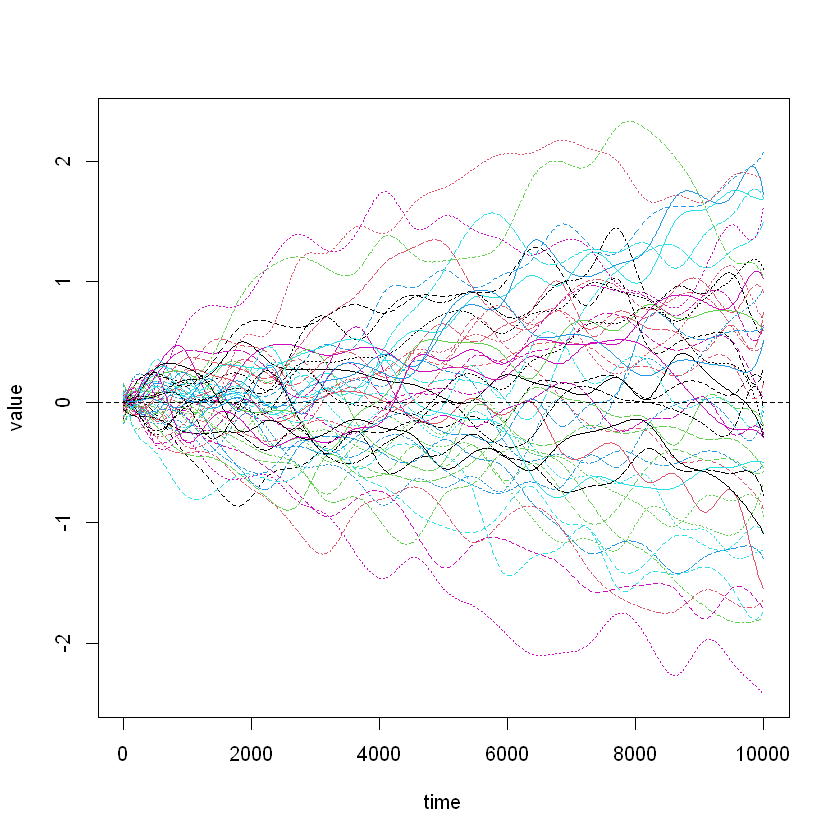

In [147]:
plot(W_fd)

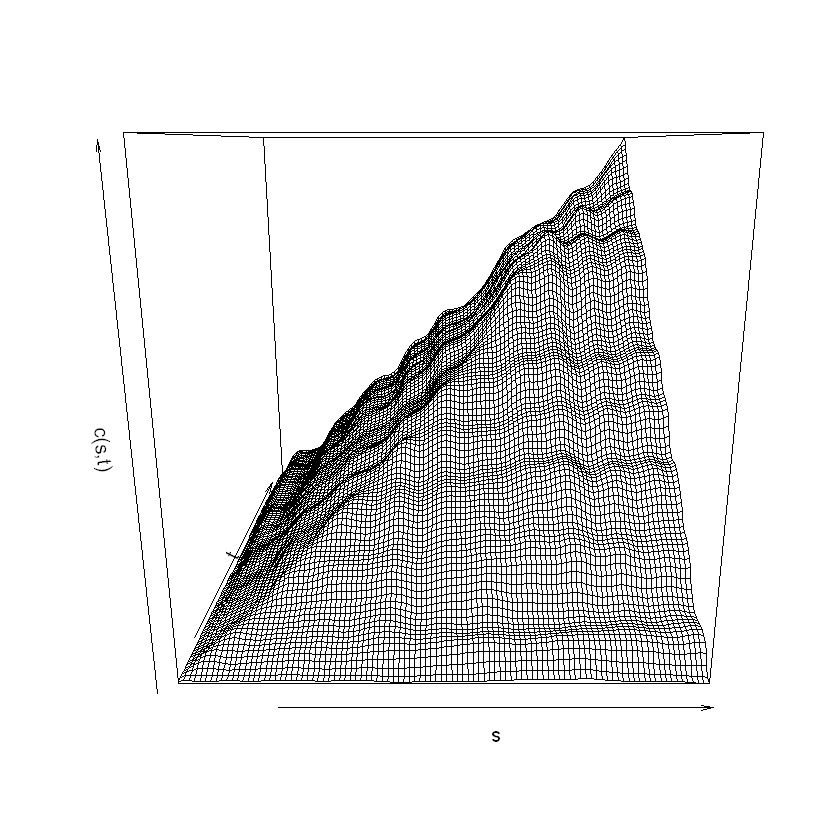

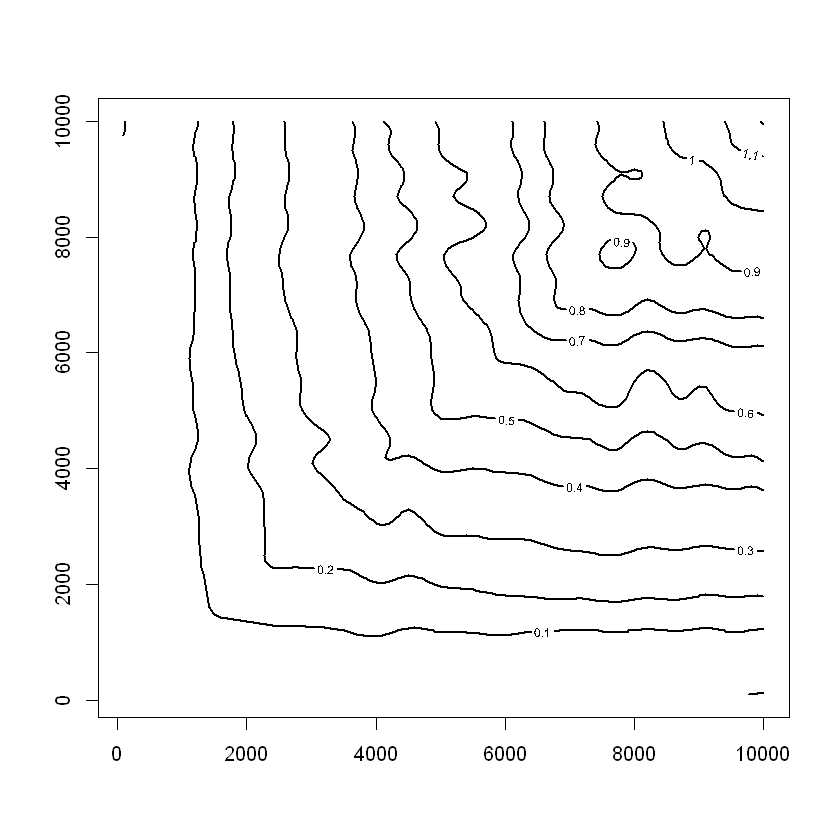

In [152]:
W_cov = var.fd(W_fd$fd)
grid = (1:100)*100
W_cov_mat = eval.bifd(grid, grid, W_cov)
persp(grid, grid, W_cov_mat, xlab="s",
        ylab="t", zlab="c(s,t)"
)
contour(grid, grid, W_cov_mat, lwd=2)

## 1.3 Principal component function    

[1] "done"

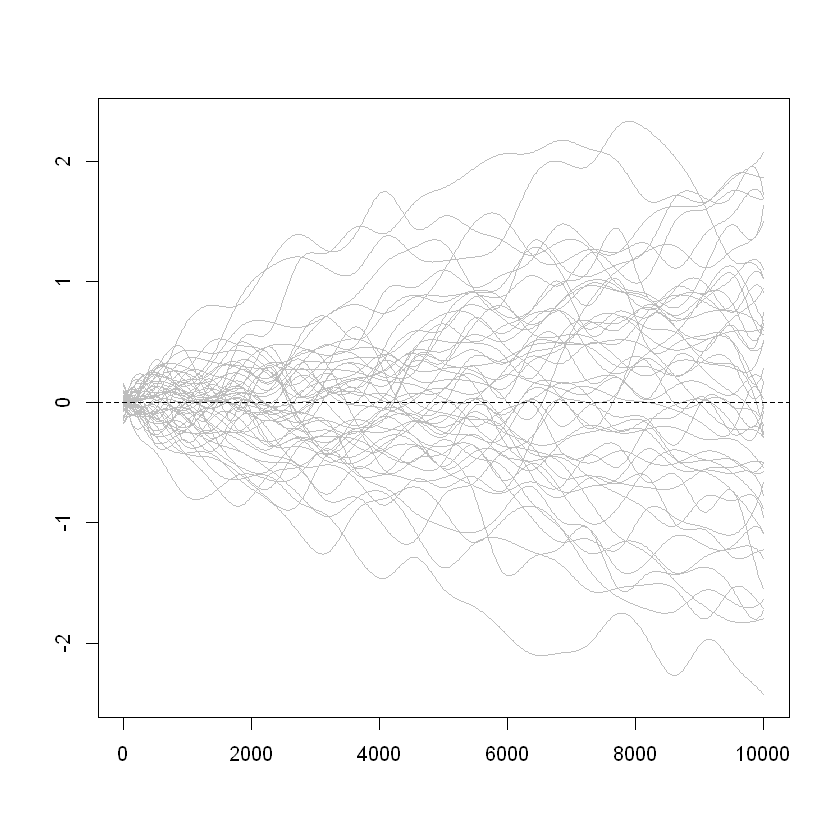

In [155]:
set.seed(123)
N=50
W_mat = matrix(0, ncol=N, nrow=10000)
for(n in 1:N){
    W_mat[, n]=cumsum(rnorm(10000)/100)
}

B25_basis = create.bspline.basis(rangeval=c(0,10000), nbasis=25)
W_fd = smooth.basis(y=W_mat, fdParobj=B25_basis)
plot(W_fd, ylab="", xlab="", col="gray", lty=1)

[1] "done"

0.8614332 0.07008462 0.02193785 0.01387032 
0.8614332 0.9315178 0.9534557 0.967326 


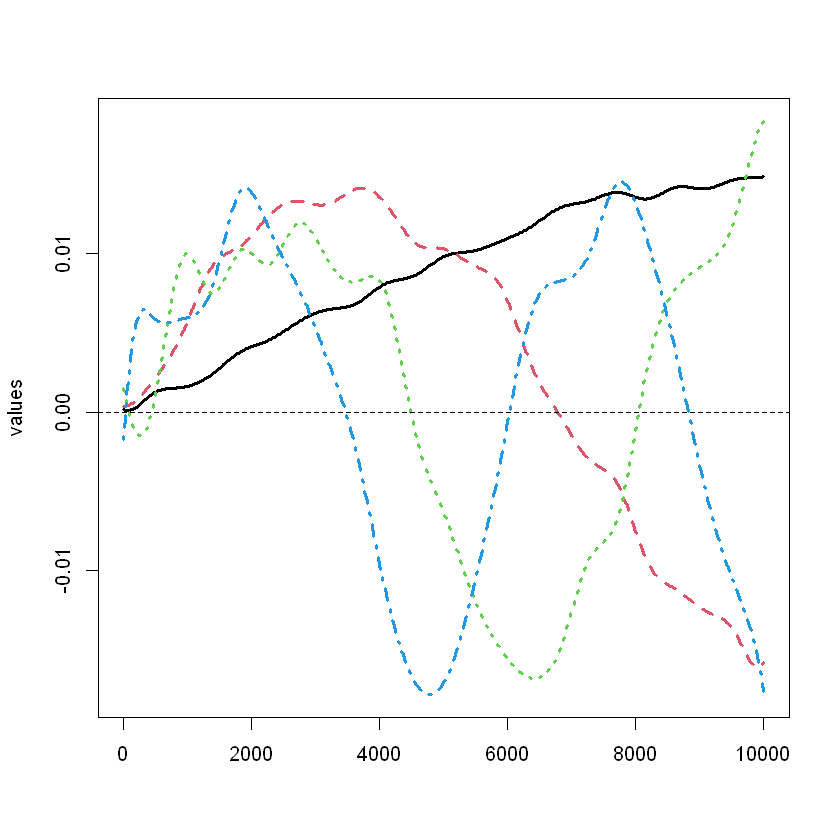

In [156]:
W_pca = pca.fd(W_fd$fd, nharm=4)
plot(W_pca$harmonics, lwd=3)
cat(W_pca$varprop,"\n")
cat(cumsum(W_pca$varprop),"\n")

## 1.4 Analysis ofBOA stock returns

1行目： BOAという名前のデータフレームをcsvファイルから読み込みます。ファイルは、GitHubリポジトリからダウンロードされます。header=TRUEは、ファイルの最初の行にヘッダー（列名）があることを示し、sep = " "は列を区切るために空白を使用することを指定します。dec = ","は10進数のセパレーターがカンマであることを指定します。

2行目： BOAの日付列を取り出します。

3行目： BOAデータフレームから日付列を除きます。

4行目： BOAデータフレームを行列に変換します。

5行目： "08/26/2004"という日付の行を除外します。この行が外れ値であると判断されたためです。

6行目： BOA行列の行数（観測数）をnに、列数（変数の数）をJに代入します。

7行目： Timesは、0から6.5までの値をJ個の等間隔な区間に分割したベクトルを作成します。これは、後でBスプライン基底関数を評価するために使用されます。

In [84]:
BOA_data = read.csv(file="https://raw.githubusercontent.com/lidom/Teaching_Repo/master/stock_prices.csv", header=TRUE, sep=" ", dec=",")
head(BOA_data)

,date,price.09.30,price.09.31,price.09.32,price.09.33,price.09.34,price.09.35,price.09.36,price.09.37,price.09.38,...,price.15.50,price.15.51,price.15.52,price.15.53,price.15.54,price.15.55,price.15.56,price.15.57,price.15.58,price.15.59
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,04/09/1997,53.84375,53.84375,53.87500,53.87500,53.84375,53.87500,53.87500,53.90625,53.90625,...,53.21875,53.20312,53.18750,53.18750,53.18750,53.18750,53.21875,53.18750,53.18750,53.18750
2,04/10/1997,53.15625,53.12500,53.12500,53.06250,53.06250,53.00000,53.00000,53.06250,53.00000,...,52.81250,52.81250,52.81250,52.81250,52.81250,52.87500,52.87500,52.87500,52.87500,52.87500
3,04/11/1997,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,...,51.00000,51.00000,51.00000,51.00000,50.93750,50.90625,50.84375,50.75000,50.78125,50.81250
4,04/14/1997,50.75000,50.75000,50.75000,50.75000,50.84375,50.81250,50.81250,50.84375,50.62500,...,51.87500,51.87500,51.81250,51.96875,52.06250,52.03125,52.03125,51.96875,51.96875,52.00000
5,04/15/1997,53.62500,53.62500,53.59375,53.53125,53.62500,53.56250,53.50000,53.56250,53.53125,...,53.28125,53.28125,53.25000,53.31250,53.34375,53.37500,53.31250,53.12500,53.03125,53.03125
6,04/16/1997,52.78125,52.78125,52.78125,52.78125,52.78125,52.71875,52.65625,52.59375,52.56250,...,52.03125,51.93750,51.84375,51.84375,51.81250,51.85938,51.90625,51.96875,51.96875,51.93750


In [85]:
dates = BOA_data$date
head(dates)

[1] "04/09/1997" "04/10/1997" "04/11/1997" "04/14/1997" "04/15/1997"
[6] "04/16/1997"

In [87]:
BOA = BOA_data[,-1]
head(BOA)

,price.09.30,price.09.31,price.09.32,price.09.33,price.09.34,price.09.35,price.09.36,price.09.37,price.09.38,price.09.39,...,price.15.50,price.15.51,price.15.52,price.15.53,price.15.54,price.15.55,price.15.56,price.15.57,price.15.58,price.15.59
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,53.84375,53.84375,53.87500,53.87500,53.84375,53.87500,53.87500,53.90625,53.90625,53.84375,...,53.21875,53.20312,53.18750,53.18750,53.18750,53.18750,53.21875,53.18750,53.18750,53.18750
2,53.15625,53.12500,53.12500,53.06250,53.06250,53.00000,53.00000,53.06250,53.00000,53.00000,...,52.81250,52.81250,52.81250,52.81250,52.81250,52.87500,52.87500,52.87500,52.87500,52.87500
3,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,...,51.00000,51.00000,51.00000,51.00000,50.93750,50.90625,50.84375,50.75000,50.78125,50.81250
4,50.75000,50.75000,50.75000,50.75000,50.84375,50.81250,50.81250,50.84375,50.62500,50.62500,...,51.87500,51.87500,51.81250,51.96875,52.06250,52.03125,52.03125,51.96875,51.96875,52.00000
5,53.62500,53.62500,53.59375,53.53125,53.62500,53.56250,53.50000,53.56250,53.53125,53.53125,...,53.28125,53.28125,53.25000,53.31250,53.34375,53.37500,53.31250,53.12500,53.03125,53.03125
6,52.78125,52.78125,52.78125,52.78125,52.78125,52.71875,52.65625,52.59375,52.56250,52.59375,...,52.03125,51.93750,51.84375,51.84375,51.81250,51.85938,51.90625,51.96875,51.96875,51.93750


In [88]:
BOA = data.matrix(BOA)
head(BOA)

price.09.30,price.09.31,price.09.32,price.09.33,price.09.34,price.09.35,price.09.36,price.09.37,price.09.38,price.09.39,...,price.15.50,price.15.51,price.15.52,price.15.53,price.15.54,price.15.55,price.15.56,price.15.57,price.15.58,price.15.59
53.84375,53.84375,53.87500,53.87500,53.84375,53.87500,53.87500,53.90625,53.90625,53.84375,...,53.21875,53.20312,53.18750,53.18750,53.18750,53.18750,53.21875,53.18750,53.18750,53.18750
53.15625,53.12500,53.12500,53.06250,53.06250,53.00000,53.00000,53.06250,53.00000,53.00000,...,52.81250,52.81250,52.81250,52.81250,52.81250,52.87500,52.87500,52.87500,52.87500,52.87500
51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,...,51.00000,51.00000,51.00000,51.00000,50.93750,50.90625,50.84375,50.75000,50.78125,50.81250
50.75000,50.75000,50.75000,50.75000,50.84375,50.81250,50.81250,50.84375,50.62500,50.62500,...,51.87500,51.87500,51.81250,51.96875,52.06250,52.03125,52.03125,51.96875,51.96875,52.00000
53.62500,53.62500,53.59375,53.53125,53.62500,53.56250,53.50000,53.56250,53.53125,53.53125,...,53.28125,53.28125,53.25000,53.31250,53.34375,53.37500,53.31250,53.12500,53.03125,53.03125
52.78125,52.78125,52.78125,52.78125,52.78125,52.71875,52.65625,52.59375,52.56250,52.59375,...,52.03125,51.93750,51.84375,51.84375,51.81250,51.85938,51.90625,51.96875,51.96875,51.93750


In [89]:
BOA = BOA[-which(dates=="08/26/2004"),] # Outlier

In [90]:
n = dim(BOA)[1]
j = dim(BOA)[2]
cat(n,"\n",j)

2510 
 390

In [91]:
times = seq(0, 6.5, length=j)
head(times)

[1] 0.00000000 0.01670951 0.03341902 0.05012853 0.06683805 0.08354756

---
8行目： BOAの累積対数収益率関数を計算します。ここで、対数変換を適用することにより、収益率の乗算が対数の加算に置き換わります。そして、最初の観測値に対する対数変換値で各列を補正し、各列を基準化します。

9行目： create.bspline.basis関数を使用して、0から6.5までの区間で定義されるBスプライン基底関数を作成します。nbは基底関数の数を指定します。ここでは、200個の基底関数が作成されます。

10行目： Data2fd関数を使用して、データセットを関数データオブジェクトに変換します。関数データオブジェクトは、関数の値と基底関数の組み合わせとして表されます。この場合、列方向に転置された累積対数収益率行列が関数データオブジェクトの値になり、Bスプライン基底関数が基底関数になります。

In [92]:
# Cumulative log-return functions
log_BOA = log(BOA) - matrix(log(BOA)[,1], nrow=n, ncol=j)

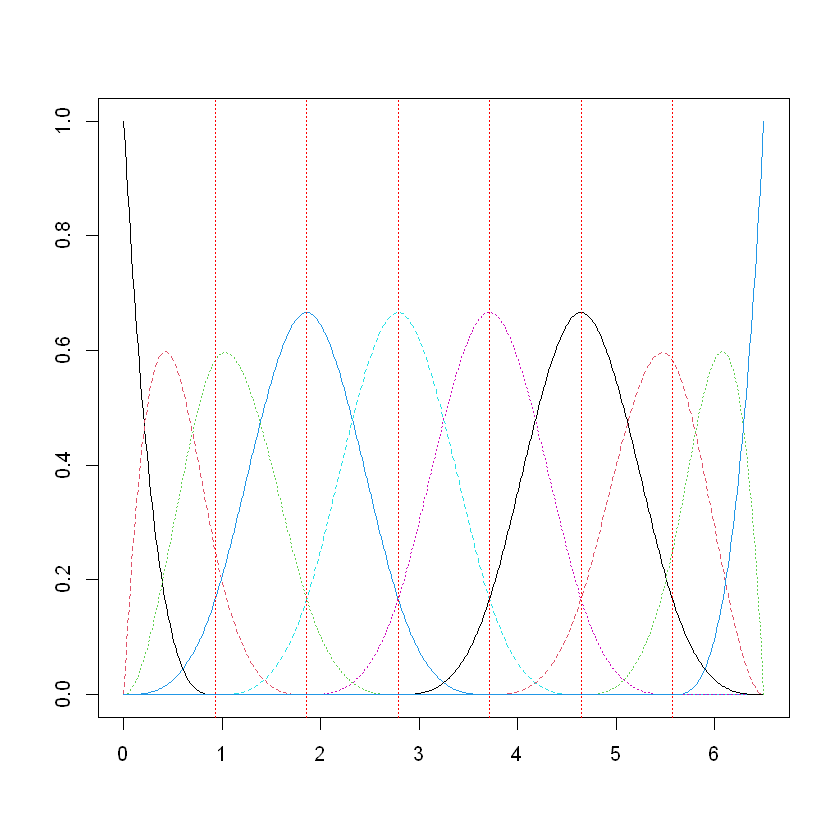

In [103]:
bspl_basis = create.bspline.basis(rangeval=c(0, 6.5), nord=4, nb=10)
plot(bspl_basis)

# B-spline basis functions
bspl_basis = create.bspline.basis(rangeval=c(0, 6.5), nord=4, nb=200)


[1] "done"

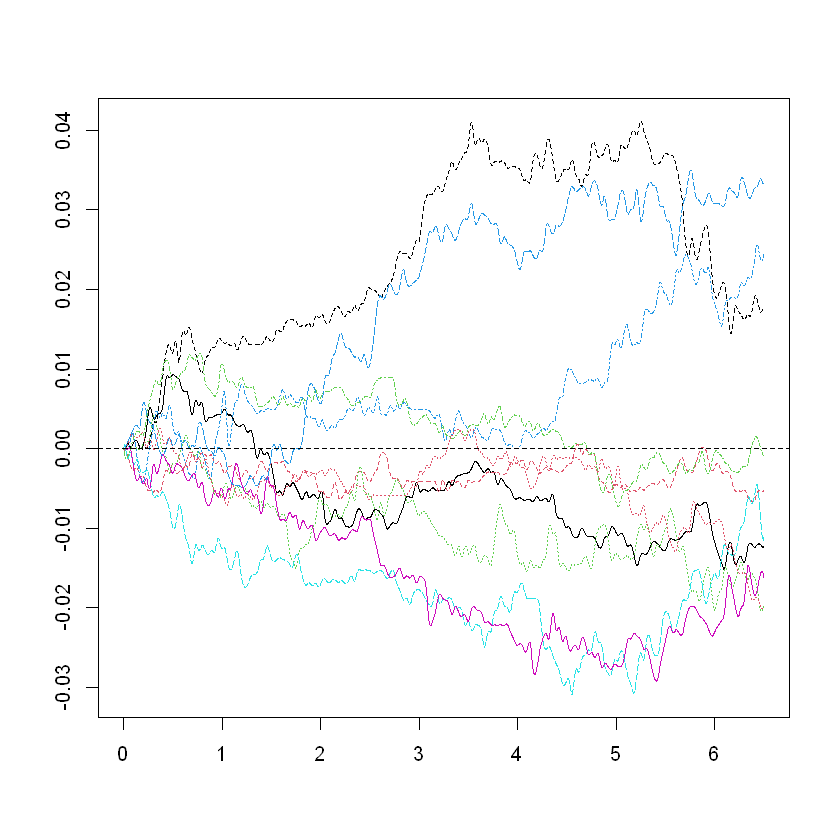

In [105]:
# Cumulative log-return functions (with basis functions)
log_BOA_fd <- Data2fd(times, t(log_BOA), basisobj = bspl_basis)
plot(log_BOA_fd[1:10],xlab="",ylab="",lwd=1.5)

[1] "done"

[1] "done"

[1] "done"

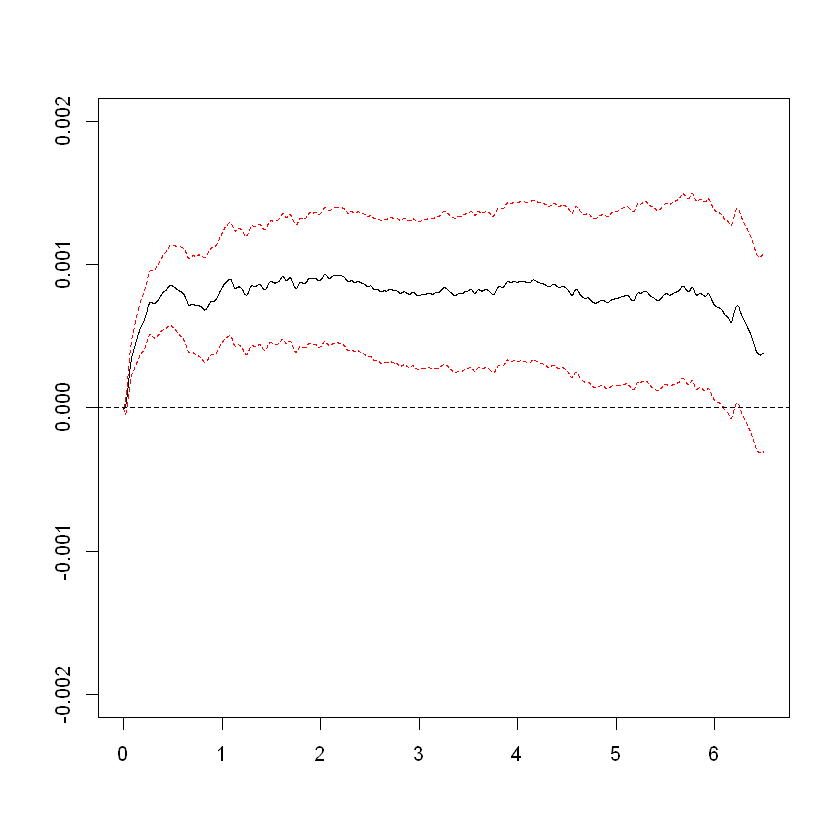

In [105]:
muhat          <- mean.fd(log_BOA_fd)
sdhat          <- sd.fd(log_BOA_fd)
SE_hat_U       <- fd(basisobj=bspl_basis) # create upper CI bound
SE_hat_L       <- fd(basisobj=bspl_basis) # create lower CI bound

SE_hat_U$coefs <-  2*sdhat$coefs/sqrt(n) + muhat$coefs
SE_hat_L$coefs <- -2*sdhat$coefs/sqrt(n) + muhat$coefs 

plot.fd(SE_hat_U,ylim=c(-0.002,0.002),col='red',lty=2,xlab="",ylab="")
plot.fd(SE_hat_L,add=TRUE,col='red',lty=2)
plot.fd(muhat,add=TRUE)


[1] "done"

0.8512517 0.07256828 0.02523702 0.01323323 
0.8512517 0.92382 0.949057 0.9622902 


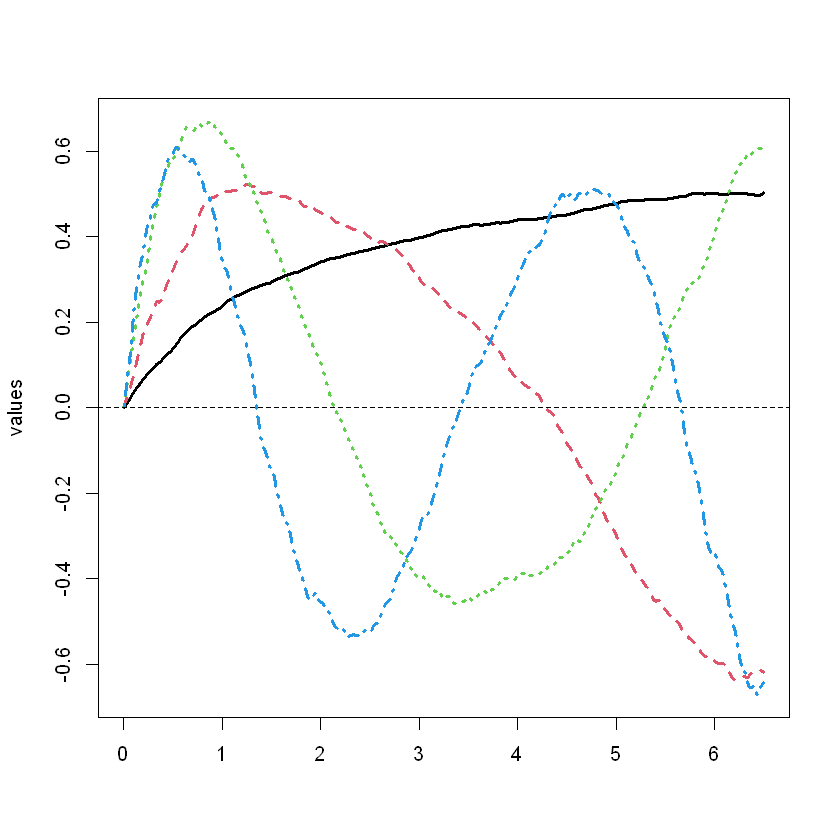

In [108]:
log_BOA_pca = pca.fd(log_BOA_fd, nharm=4)
plot(log_BOA_pca$harmonics, lwd=3)
cat(log_BOA_pca$varprop,"\n")
cat(cumsum(log_BOA_pca$varprop),"\n")

# 1.5 Diffusion tensor imaging

In [113]:
library(refund)
data(DTI)

In [116]:
str(DTI)

'data.frame':	382 obs. of  9 variables:
 $ ID        : num  1001 1002 1003 1004 1005 ...
 $ visit     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ visit.time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Nscans    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ case      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "male","female": 2 2 1 1 1 1 1 1 1 1 ...
 $ pasat     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ cca       : num [1:382, 1:93] 0.491 0.472 0.502 0.402 0.402 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:382] "1001_1" "1002_1" "1003_1" "1004_1" ...
  .. ..$ : chr [1:93] "cca_1" "cca_2" "cca_3" "cca_4" ...
 $ rcst      : num [1:382, 1:55] 0.257 NaN NaN 0.508 NaN ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:382] "1001_1" "1002_1" "1003_1" "1004_1" ...
  .. ..$ : chr [1:55] "rcst_1" "rcst_2" "rcst_3" "rcst_4" ...


In [118]:
head(DTI)

,ID,visit,visit.time,Nscans,case,sex,pasat,cca,rcst
,<dbl>,<int>,<int>,<int>,<dbl>,<fct>,<int>,"<dbl[,93]>","<dbl[,55]>"
1,1001,1,0,1,0,female,NA,"0.4909345, 0.5168018, 0.5356539, 0.5553587, 0.5927610, 0.6326935, 0.6503855, 0.6556130, 0.6493701, 0.6378739, 0.6286463, 0.6249649, 0.6164504, 0.6113308, 0.5846939, 0.5385250, 0.4950826, 0.4952554, 0.4888065, 0.4825257, 0.4741349, 0.4898970, 0.4928850, 0.4911993, 0.4932295, 0.5043283, 0.5092916, 0.5059736, 0.5065265, 0.5050361, 0.5066120, 0.5028980, 0.5073618, 0.5081009, 0.5247082, 0.5252773, 0.5235987, 0.5243505, 0.5254499, 0.5306318, 0.5338370, 0.5296567, 0.5318295, 0.5296125, 0.5331821, 0.5288681, 0.5307563, 0.5416137, 0.5452572, 0.5474421, 0.5441192, 0.5347157, 0.5279458, 0.5259310, 0.5175913, 0.5234301, 0.5217467, 0.5250109, 0.5195787, 0.5092322, 0.4879112, 0.4754212, 0.4655447, 0.4513198, 0.4394037, 0.4379589, 0.4339554, 0.4245345, 0.4179126, 0.4184430, 0.4117148, 0.4191516, 0.4376579, 0.4528836, 0.4735466, 0.4922851, 0.4976906, 0.5111858, 0.5357575, 0.5380131, 0.5387591, 0.5385923, 0.5431367, 0.5632726, 0.5903442, 0.5812517, 0.5768193, 0.5916373, 0.6047983, 0.6118206, 0.6072471, 0.5974377, 0.5904773","0.2572899, 0.4539093, 0.3974958, 0.3915055, 0.4181097, 0.4165069, 0.4357346, 0.4540771, 0.4841092, 0.4536247, 0.5051717, 0.5190712, 0.5807487, 0.5661553, 0.5833364, 0.5603094, 0.5345778, 0.5623530, 0.6101868, 0.6075959, 0.6240531, 0.7011781, 0.7701491, 0.7426501, 0.6603320, 0.6868709, 0.6910859, 0.7008225, 0.7090975, 0.7170979, 0.7262979, 0.7284356, 0.7156681, 0.6972388, 0.6685733, 0.6328179, 0.5990850, 0.5801229, 0.5738956, 0.5527057, 0.5058014, 0.4450996, 0.3727109, 0.3259199, 0.3151132, 0.3231551, 0.3733820, 0.4597227, 0.5190081, 0.5084256, 0.5013133, 0.4828025, 0.4709835, 0.4287402, 0.4557126"
2,1002,1,0,1,0,female,NA,"0.4721627, 0.4868219, 0.5022577, 0.5233635, 0.5524401, 0.5872003, 0.5970120, 0.6026607, 0.5922767, 0.5791859, 0.5714253, 0.5640410, 0.5488670, 0.5148614, 0.4690637, 0.4654895, 0.4945643, 0.5027834, 0.5290919, 0.5236951, 0.5009698, 0.5070110, 0.5206877, 0.5153710, 0.5076689, 0.5017398, 0.4982807, 0.4993118, 0.4869815, 0.4797477, 0.4787024, 0.4760067, 0.4795855, 0.4781358, 0.4784981, 0.4869597, 0.5065917, 0.5220251, 0.5445128, 0.5510683, 0.5453291, 0.5442394, 0.5345523, 0.5294878, 0.5287803, 0.5116867, 0.4984125, 0.4872645, 0.4818140, 0.4791778, 0.4769786, 0.4805995, 0.4742046, 0.4575991, 0.4526461, 0.4501681, 0.4521089, 0.4581485, 0.4618510, 0.4685422, 0.4699607, 0.4765646, 0.4666116, 0.4626807, 0.4690559, 0.4767521, 0.4787997, 0.4795087, 0.4818308, 0.4887047, 0.4940524, 0.5075587, 0.5209661, 0.5285265, 0.5200662, 0.5465158, 0.5642346, 0.5570745, 0.5766790, 0.5894610, 0.5750992, 0.5891457, 0.6038479, 0.6269639, 0.6265557, 0.6024469, 0.5859679, 0.5778964, 0.5849247, 0.6037823, 0.6068070, 0.5946983, 0.5802742","NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, 0.4427903, 0.4799762, 0.4842274, 0.5239656, 0.5594616, 0.6047412, 0.6070987, 0.6534204, 0.6910838, 0.6663648, 0.7453985, 0.7552195, 0.7129236, 0.6598093, 0.6647575, 0.7498987, 0.7653176, 0.7016240, 0.7160461, 0.7138011, 0.6769029, 0.6252532, 0.6085429, 0.5917788, 0.5692703, 0.5564034, 0.5408012, 0.4996903, 0.4079949, 0.3440148, 0.3113530, 0.3197576, 0.3746915, 0.4106683, 0.4513569, 0.4839963, 0.4920049, 0.5002135, 0.5298003, 0.5132566, 0.4892501, 0.5183189, 0.5100032"
3,1003,1,0,1,0,male,NA,"0.5023738, 0.5136516, 0.5392542, 0.5742101, 0.6031339, 0.6335913, 0.6357541, 0.6350799, 0.6201638, 0.6086281, 0.5910287, 0.5680196, 0.5433478, 0.5134790, 0.4871413, 0.4840465, 0.4948048, 0.4906371, 0.4877579, 0.4742280, 0.4738927, 0.4807152, 0.4739193, 0.4670146, 0.4849994, 0.4870079, 0.4788655, 0.4700110, 0.4724737, 0.4824247, 0.4725281, 0.4758382, 0.4773336, 0.4825085, 0.4907332, 0.4852776, 0.4835870, 0.4742337, 0.4742299, 0.4688590, 0.4722176, 0.4788008, 0.4803440, 0.4789484, 0.4802429, 0.4883517, 0.4993035, 0.5062250, 0.5014466, 0.4911293, 0.4988815, 0.5020438, 0.5023207, 0.4976664, 0.4900235, 0.4861588, 0

In [124]:
y = DTI$cca
y = y[-c(126, 130, 131, 125, 319, 321),] # missing values

In [125]:
dim(y)

[1] 376  93

In [127]:
N = dim(y)[1]
M = dim(y)[2]

In [134]:
argvals = seq(0,1,length=M)
data_basis = create.bspline.basis(c(0,1), nbasis=10)
y_fd = Data2fd(argvals, t(y), data_basis)

[1] "done"

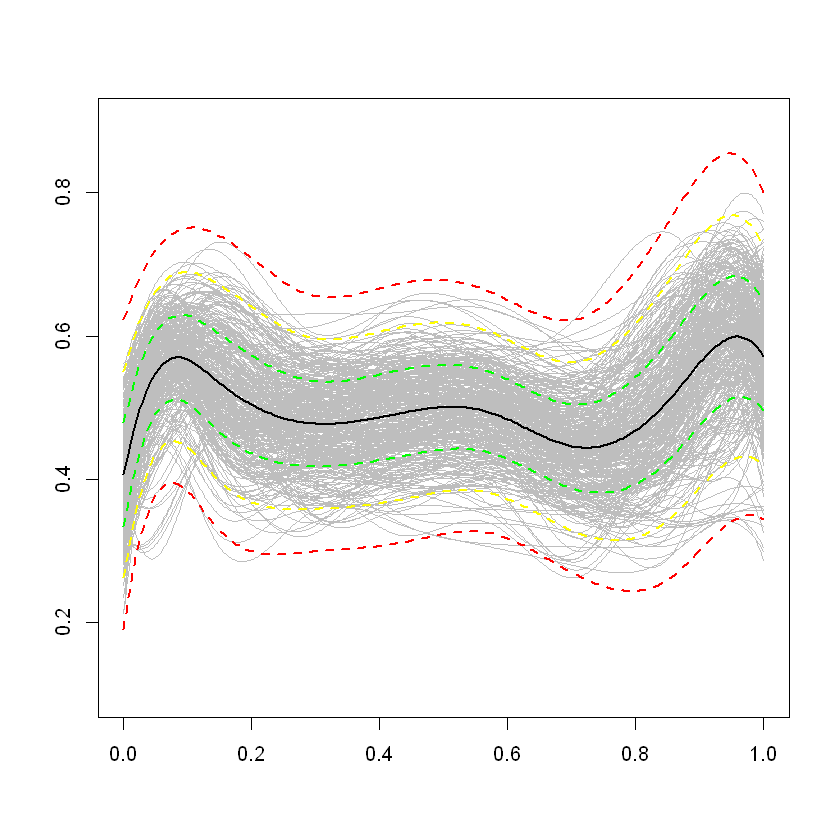

In [138]:
dev.new(width=8, height=6)
plot(y_fd, lty=1, col="gray", xlab="", ylab="", ylim=c(0.1, .9))
lines(mean.fd(y_fd), lwd=2)
lines(mean.fd(y_fd) + std.fd(y_fd), lwd=2, lty=2, col="green")
lines(mean.fd(y_fd) + 2*std.fd(y_fd), lwd=2, lty=2, col="yellow")
lines(mean.fd(y_fd) + 3*std.fd(y_fd), lwd=2, lty=2, col="red")
lines(mean.fd(y_fd) - std.fd(y_fd), lwd=2, lty=2, col="green")
lines(mean.fd(y_fd) - 2*std.fd(y_fd), lwd=2, lty=2, col="yellow")
lines(mean.fd(y_fd) - 3*std.fd(y_fd), lwd=2, lty=2, col="red")

## 1.6 Problems

In [ ]:
### 1.1